In [23]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


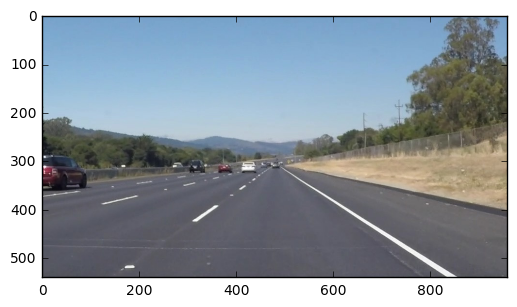

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960)


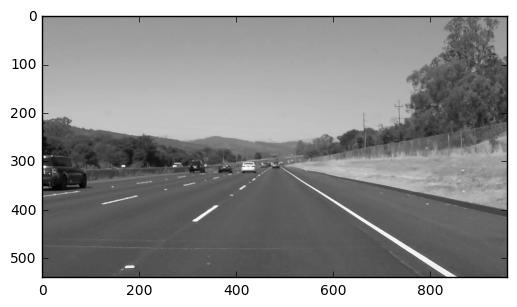

In [24]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
plt.show()
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# Define a kernel size and apply Gaussian smoothing. A larger kernel_size implies averaging, or smoothing, over a larger area.
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

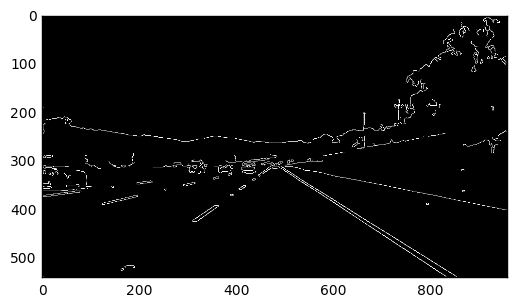

In [47]:
# Define our parameters for Canny and apply
#The algorithm will first detect strong edge (strong gradient) pixels above the high_threshold, and reject pixels below the low_threshold. Next, pixels with values between the low_threshold and high_threshold will be included as long as they are connected to strong edges.
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='Greys_r')
plt.show()

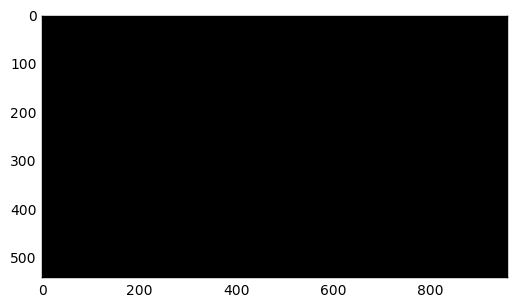

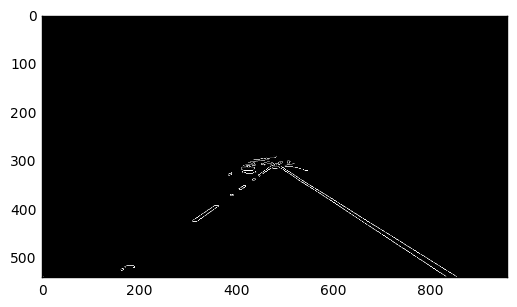

In [48]:
# Mask Image
mask = np.zeros_like(edges) 
plt.imshow(mask, cmap='Greys_r')
plt.show()
ignore_mask_color = 255 

# Define a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges, cmap='Greys_r')
plt.show()
####################################


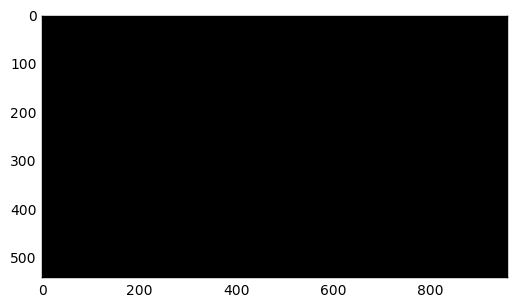

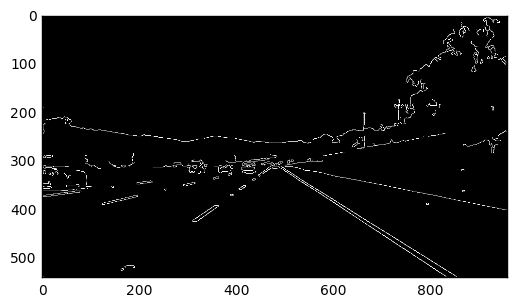

In [40]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 4 #minimum number of pixels making up a line
max_line_gap = 20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0# creating a blank to draw lines on
plt.imshow(line_image)
plt.show()
# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 
plt.imshow(color_edges)
plt.show()

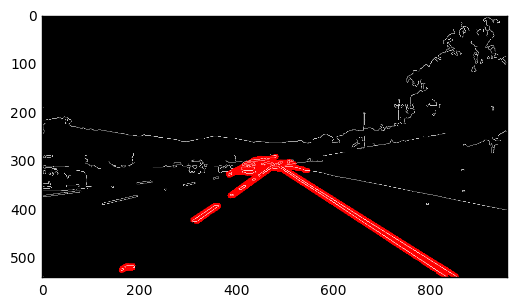

In [41]:
# Draw the lines on the edge image
lines_edges_color = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges_color)
plt.show()


In [ ]:
line_image = np.copy(image)*0 # creating a blank to draw lines on
draw_lines_image = draw_lines(line_image, lines, color=[255, 0, 0], thickness=2)

In [ ]:
plt.imshow(reg_int_image, cmap='Greys_r')
plt.show()
plt.imshow(hough_lines_image, cmap='Greys_r')
plt.show()